In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Load the image
image = cv2.imread('image.jfif', 0)

In [ ]:
# Perform Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

In [ ]:
# Calculate magnitude spectrum (for visualization)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

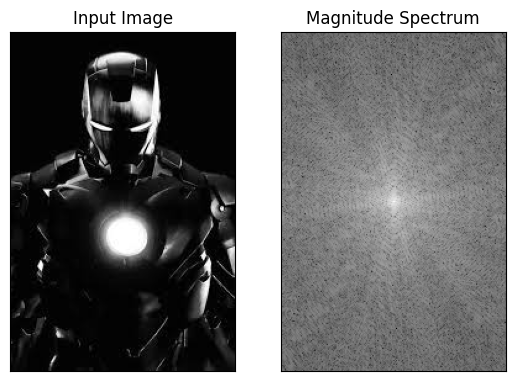

In [ ]:
# Display the original image and its magnitude spectrum
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# 1. Inverse Fourier Transform
f_ishift = np.fft.ifftshift(fshift)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)

In [ ]:
# 2. Low-pass filtering
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
fshift_lowpass = fshift.copy()
fshift_lowpass[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0

In [ ]:
# 3. Inverse Fourier Transform after low-pass filtering
f_ishift_lowpass = np.fft.ifftshift(fshift_lowpass)
image_lowpass = np.fft.ifft2(f_ishift_lowpass)
image_lowpass = np.abs(image_lowpass)

In [ ]:
# 4. High-pass filtering
fshift_highpass = fshift.copy()
fshift_highpass[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0

In [ ]:
# 5. Inverse Fourier Transform after high-pass filtering
f_ishift_highpass = np.fft.ifftshift(fshift_highpass)
image_highpass = np.fft.ifft2(f_ishift_highpass)
image_highpass = np.abs(image_highpass)

In [ ]:
# 6. Band-pass filtering
fshift_bandpass = fshift.copy()
fshift_bandpass[:crow - 30, :] = 0
fshift_bandpass[crow + 30:, :] = 0
fshift_bandpass[:, :ccol - 30] = 0
fshift_bandpass[:, ccol + 30:] = 0

In [ ]:
# 7. Inverse Fourier Transform after band-pass filtering
f_ishift_bandpass = np.fft.ifftshift(fshift_bandpass)
image_bandpass = np.fft.ifft2(f_ishift_bandpass)
image_bandpass = np.abs(image_bandpass)

In [ ]:
# 8. Frequency domain arithmetic (addition)
image_add = image + image_back

In [ ]:
# 9. Frequency domain arithmetic (subtraction)
image_subtract = image - image_back

In [ ]:
# 10. Frequency domain arithmetic (multiplication)
image_multiply = image * image_back

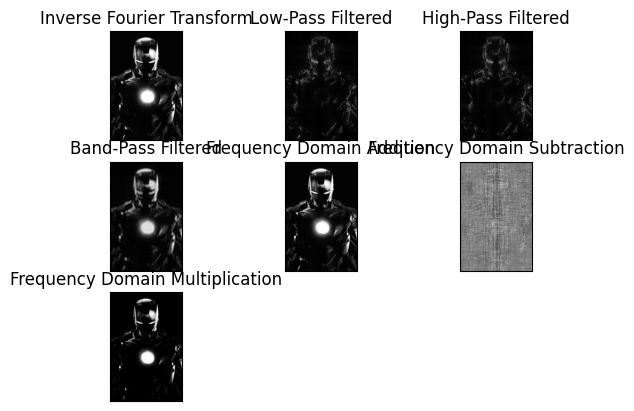

In [ ]:
# Display the processed images
plt.subplot(331), plt.imshow(image_back, cmap='gray')
plt.title('Inverse Fourier Transform'), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(image_lowpass, cmap='gray')
plt.title('Low-Pass Filtered'), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(image_highpass, cmap='gray')
plt.title('High-Pass Filtered'), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(image_bandpass, cmap='gray')
plt.title('Band-Pass Filtered'), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(image_add, cmap='gray')
plt.title('Frequency Domain Addition'), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(image_subtract, cmap='gray')
plt.title('Frequency Domain Subtraction'), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(image_multiply, cmap='gray')
plt.title('Frequency Domain Multiplication'), plt.xticks([]), plt.yticks([])
plt.show()